In [2]:
pip install ultralytics

     ---------------------------------------- 0.0/40.4 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.4 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 40.4/40.4 kB 479.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/749.1 kB ? eta -:--:--
   ------- -------------------------------- 143.4/749.1 kB 4.2 MB/s eta 0:00:01
   ------------------ --------------------- 337.9/749.1 kB 3.5 MB/s eta 0:00:01
   ---------------------------------- ----- 645.1/749.1 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 749.1/749.1 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB 7.4 MB/s eta 0:00:02
   - -------------------------------------- 0.6/11.6 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.6 MB 8.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.6 MB 9.3 MB/s eta 0:00:02

In [19]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [21]:
import tifffile
import os
from skimage.io import imread
from patchify import patchify
import numpy as np
from PIL import Image

In [22]:
directory_path = './dataset/eye_image_seg/train'

image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.jpg')]
mask_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('_mask.png')]

image_files.sort()
mask_files.sort()

In [27]:
image_files

['./dataset/eye_image_seg/train\\WhatsApp-Image-2023-06-07-at-21-17-050_jpg.rf.93aaa3075617070913a35954320b77ac.jpg',
 './dataset/eye_image_seg/train\\WhatsApp-Image-2023-06-07-at-21-17-500_jpg.rf.71ce0186dd1e8221734eac2f6b3b56f4.jpg',
 './dataset/eye_image_seg/train\\WhatsApp-Image-2023-06-07-at-21-17-50_jpg.rf.862cab8315f0b4f300cdc3f08154f7e0.jpg',
 './dataset/eye_image_seg/train\\WhatsApp-Video-2023-06-07-at-22_32_48_mp4-1_jpg.rf.076d1922cbb9eb2851bb8f834dcb8354.jpg',
 './dataset/eye_image_seg/train\\WhatsApp-Video-2023-06-07-at-22_32_48_mp4-2_jpg.rf.284aae85e29d4fa549e0e6ba5f339c3c.jpg',
 './dataset/eye_image_seg/train\\WhatsApp-Video-2023-06-07-at-22_32_48_mp4-3_jpg.rf.4370cd47acea08d23a50b45b89df0bde.jpg',
 './dataset/eye_image_seg/train\\WhatsApp-Video-2023-06-07-at-22_32_48_mp4-4_jpg.rf.9b03c3f7f7ad775d53bd4cb4e747f98d.jpg',
 './dataset/eye_image_seg/train\\WhatsApp-Video-2023-06-07-at-22_32_48_mp4-5_jpg.rf.90be8cf49fa36cef9c56e5d9fd2a343a.jpg',
 './dataset/eye_image_seg/train\

In [23]:
# 패치 크기 및 스텝 설정
patch_size = 256
step = 256

all_img_patches = []
all_mask_patches = []

# 이미지와 마스크를 패치로 나누기
for img_path, mask_path in zip(image_files, mask_files):
    img = imread(img_path)
    mask = imread(mask_path)

    patches_img = patchify(img, (patch_size, patch_size), step=step)
    patches_mask = patchify(mask, (patch_size, patch_size), step=step)

    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i,j,:,:].astype(np.uint8)  # 이미지를 uint8 타입으로 변환
            single_patch_mask = patches_mask[i,j,:,:].astype(np.uint8)  # 마스크도 uint8 타입으로 변환
            all_img_patches.append(single_patch_img)
            all_mask_patches.append(single_patch_mask)

images = np.array(all_img_patches)
masks = np.array(all_mask_patches)

ValueError: `window_shape` is incompatible with `arr_in.shape`

In [7]:
!nvidia-smi

Thu Apr  4 13:00:09 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   36C    P8    18W / 180W |   2170MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from ultralytics import SAM
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
model = SAM('sam_b.pt')

100%|███████████████████████████████████████████████████████████████████████████████| 358M/358M [00:10<00:00, 35.7MB/s]


In [5]:
model.info()

Model summary: 238 layers, 93735472 parameters, 93735472 gradients


(238, 93735472, 93735472, 0.0)

In [13]:
# TODO
# 1. 데이터 셋 폴더 구조 구축
# 2. 데이터 라벨링 데이터 확인
# 3. 원천 데이터 이미지 확인
# 4. 모델 학습 및 SAM 하이퍼 파라미터 조정
# 5. 모델 평가

#### 데이터셋 압축 풀기

In [15]:
import shutil
file_name = "./dataset/ss_aney_btwg3ny_mn_seh_ss.v3i.png-mask-semantic.zip"
output_dir = "./dataset/eye_image_seg"
format = "zip"
shutil.unpack_archive(file_name, output_dir, format)

In [26]:
import os
import random

def get_random_image_path(folder_path):
    files_and_dirs = os.listdir(folder_path)
    
    image_files = [file for file in files_and_dirs if os.path.isfile(os.path.join(folder_path, file)) and file.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if image_files:
        return os.path.join(folder_path, random.choice(image_files))
    else:
        return None

folder_path = './dataset/eye_image_seg/train'
random_image_path = get_random_image_path(folder_path)

if random_image_path:
    print("Random Image Path:", random_image_path)
else:
    print("No images found in the folder.")


Random Image Path: ./dataset/eye_image_seg/train\WhatsApp-Video-2023-07-08-at-03_35_57_mp4-1_jpg.rf.8b886fc9a79af9762e74abd09a2e8585_mask.png


In [27]:
image_path3 = './dataset/eye_image_seg/train\WhatsApp-Video-2023-07-08-at-03_35_57_mp4-1_jpg.rf.8b886fc9a79af9762e74abd09a2e8585.jpg'
image_path4 = './dataset/eye_image_seg/train\WhatsApp-Video-2023-07-08-at-03_35_57_mp4-1_jpg.rf.8b886fc9a79af9762e74abd09a2e8585_mask.png'

image3: 320 / 240
image4: 320 / 240


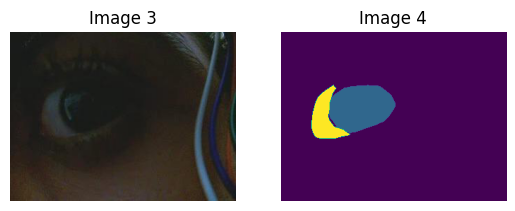

In [29]:
image3 = Image.open(image_path3)
image4 = Image.open(image_path4)

width, height = image3.size
print(f"image3: {width} / {height}")
width, height = image4.size
print(f"image4: {width} / {height}")

plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(image3)
plt.axis('off')
plt.title('Image 3')

plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.imshow(image4)
plt.axis('off')
plt.title('Image 4')

plt.show()

In [4]:
image_path1 = './dataset/eye_image_seg/train\WhatsApp-Image-2023-06-07-at-21-17-050_jpg.rf.93aaa3075617070913a35954320b77ac.jpg'
image_path2 = './dataset/eye_image_seg/train\WhatsApp-Image-2023-06-07-at-21-17-050_jpg.rf.93aaa3075617070913a35954320b77ac_mask.png'

image1: 768 / 1024
image2: 768 / 1024


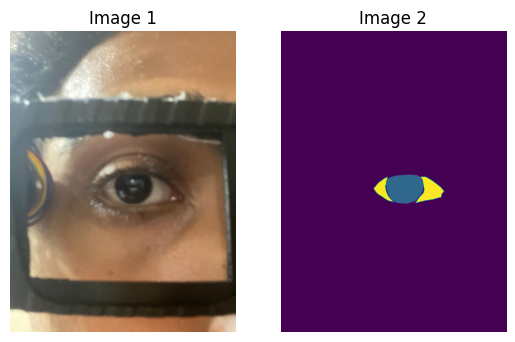

In [8]:
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

width, height = image1.size
print(f"image1: {width} / {height}")
width, height = image2.size
print(f"image2: {width} / {height}")

plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(image1)
plt.axis('off')
plt.title('Image 1')

plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.imshow(image2)
plt.axis('off')
plt.title('Image 2')

plt.show()

In [13]:
image1.size
image2.size

(768, 1024)